In [65]:
import matplotlib.pyplot as pl
%pylab inline
import numpy as np

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [66]:
pl.rcParams['figure.figsize']=10,7.5
pl.rcParams['axes.grid']=True
pl.gray()


In [67]:
from sklearn.datasets import load_digits
digits=load_digits()
X,y=digits.data, digits.target
X.shape

(1797, 64)

Vamos a reproducir los digitos teniendo en cuenta los pixeles, tenemos en 
cuenta que son 1797 datos con 64 características. En este caso específico, 
las características son los pixeles por imagen, es decir 8x8.

In [68]:
#Función para reproducir imágenes.
def dibujar(data, labels,shape, interpolation='Nearest'):
    for i in range(data.shape[0]):
        pl.subplot(1,data.shape[0],(i+1))
        pl.imshow(data[i].reshape(shape),interpolation=interpolation)
        pl.title(labels[i])
        pl.xticks(()),pl.yticks(())


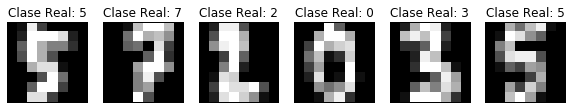

In [69]:
#Tomando aleatoriamente seis imágenes para dibujarlas:
ejemplos=np.random.permutation(X.shape[0])[:6]
imagenes=X[ejemplos]
labels=['Clase Real: %d' % l for l in y[ejemplos]]
dibujar(imagenes,labels,shape=(8,8))

La idea principal de PCA es reducir el número de características de los datos 
utilizando ejes ortogonales a lo largo de las variaciones (mayores) en los datos. 

El algoritmo es el siguiente:
- Hallar el promedio de los datos y restarlo.
- Calcular la matríz de covarianza de los anteriores datos.
- Calcular autovalores y autovectores de la matríz de covarianza.
- Organizar los autovectores del más grande al más pequeño
- Tomar los primeros N autovectores (componentes principales)
- Transformas los datos en un nuevo espacio creado por los primeros N autovectores

In [70]:
datos=X

In [71]:
#La función PCA es la siguiente:
def pca(datos,maxCarac=9999999):
    promedios=mean(datos,axis=0)
    nuevos=datos-promedios
    matCov=cov(nuevos,rowvar=0)
    autoVal,autoVect=linalg.eig(mat(matCov))
    autoValOrg=argsort(autoVal)
    autoValOrg=autoValOrg[:-(maxCarac+1):-1]
    autoVectRed=autoVect[:,autoValOrg]
    datosRed=nuevos*autoVectRed
    return datosRed

In [72]:
datReducidos=np.array(pca(datos,2))

In [73]:
datReducidos=datReducidos*(-1)

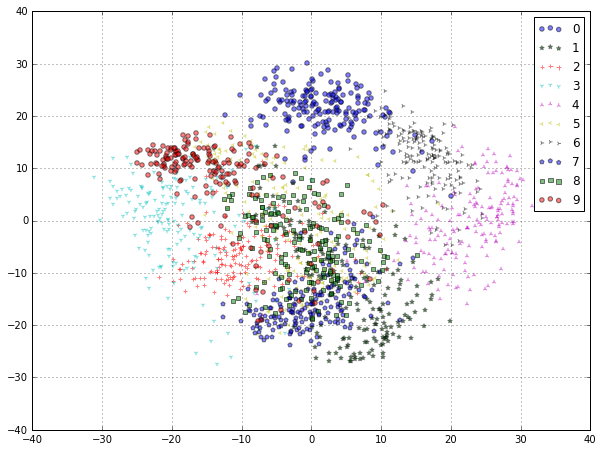

In [74]:
#Con las dos características principales vamos a analizar la dispersión de datos
from itertools import cycle

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
markers = ['o', '*', '+', '1', '2', '3', '4', 'p', 's']
for i, c, m in zip(np.unique(y), cycle(colors), cycle(markers)):
    pl.scatter(datReducidos[y == i, 0], datReducidos[y == i, 1],c=c, marker=m, label=i, alpha=0.5)

_ = pl.legend(loc='best')

Vamos a comparar algoritmo con la librería PCA de SKlearn

In [75]:
from sklearn.decomposition import RandomizedPCA

pca = RandomizedPCA(n_components=2)
X_pca = pca.fit_transform(X)

In [76]:
X_pca

array([[ -1.25835361,  21.27396451],
       [  7.95982628, -20.76978744],
       [  6.99045356,  -9.95505909],
       ..., 
       [ 10.79877108,  -6.95831671],
       [ -4.87611585,  12.42547458],
       [ -0.34882283,   6.36827387]])

In [77]:
datReducidos

array([[ -1.25946645,  21.27488348],
       [  7.9576113 , -20.76869896],
       [  6.99192297,  -9.95598641],
       ..., 
       [ 10.8012837 ,  -6.96025223],
       [ -4.87210009,  12.42395362],
       [ -0.34438963,   6.36554919]])

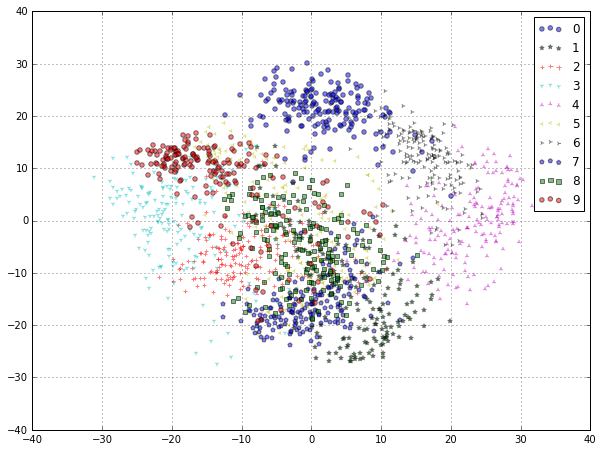

In [78]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
markers = ['o', '*', '+', '1', '2', '3', '4', 'p', 's']
for i, c, m in zip(np.unique(y), cycle(colors), cycle(markers)):
    pl.scatter(X_pca[y == i, 0], X_pca[y == i, 1],c=c, marker=m, label=i, alpha=0.5)

_ = pl.legend(loc='best')


In [79]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [80]:
X_pca.shape

(1797, 2)

In [81]:
datReducidos.shape

(1797, 2)

In [82]:
import operator
def clasificacion(ingreso, datos, labels,near):
    dataSize=datos.shape[0]
    diferencia=tile(ingreso,(dataSize,1))-datos
    SqrtDife=diferencia**2
    SqrtDist=SqrtDife.sum(axis=1)
    distancias=SqrtDist**2
    IndiOrde=distancias.argsort()
    contador={}
    for i in range(near):
        votar=labels[IndiOrde[i]]
        contador[votar]=contador.get(votar,0)+1
    contadorclas=sorted(contador.iteritems(),key=operator.itemgetter(1),reverse=True)
    return contadorclas[0][0]

In [83]:
x1=[-30,0]

In [84]:
clasificacion(x1,datReducidos,y,3)

3